In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
file = "Customer Churn.csv"

df = pd.read_csv(file)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# no. rows and columns
df.shape

(7043, 21)

In [5]:
# null values 

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- there are blank values in totalcharges col

    because tenure = 0 and totalcharges = blank, turn it into 0

    converting dtype to float

In [7]:
# replace totalcharges blank values to 0

df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].astype('float'))


In [8]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['customerID'].duplicated().sum()

np.int64(0)

In [13]:
def conv(value):
    if value == 0:
        return "no"
    else:
        return "yes"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

- converted 0 and 1 values of seniorcitizen to yes and no to make easier to interpret

In [14]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

### Analysis

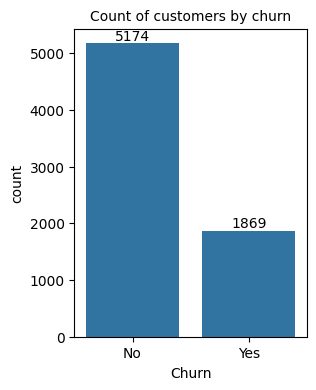

In [15]:
plt.figure(figsize= (3,4))
ax = sn.countplot(x = df['Churn'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn", fontsize = 10)
plt.show()

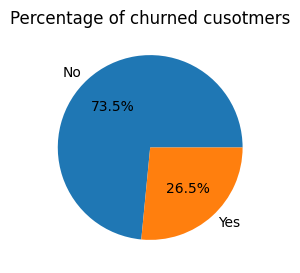

In [16]:
# gb = df.groupby('Churn')['customerID'].count()
gb = df.groupby('Churn').agg({'Churn':'count'})

plt.figure(figsize= (4,3))
plt.pie(gb['Churn'],labels= gb.index, autopct= "%1.1f%%")
plt.title("Percentage of churned cusotmers")
plt.show()

- from the given pie chart we can conclude that 26.5 % of our cusotmers have churned put

- lets understand the reason behind it

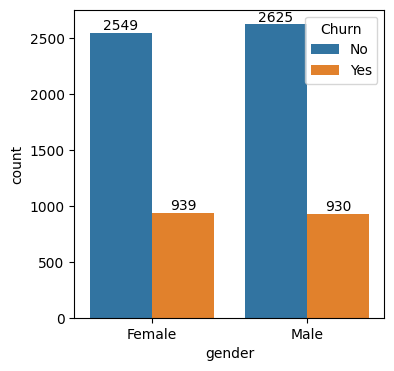

In [27]:
plt.figure(figsize= (4,4))
ax = sn.countplot(x= df['gender'], data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

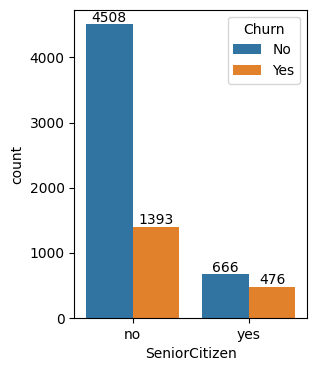

In [25]:
plt.figure(figsize=(3,4))
ax = sn.countplot(x = df['SeniorCitizen'], data = df, hue= 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

- comparatively a greater % of people in senior citezen category have churned

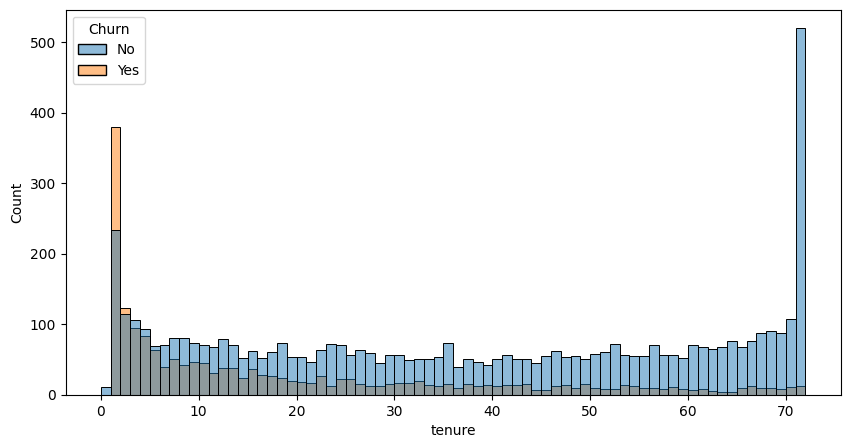

In [33]:
plt.figure(figsize=(10,5))
sn.histplot(x= df['tenure'], data= df, bins= 72, hue= "Churn")
plt.show()

- people who have used our services long time have staed, and people who used our services for less (1-2 months) time have churned

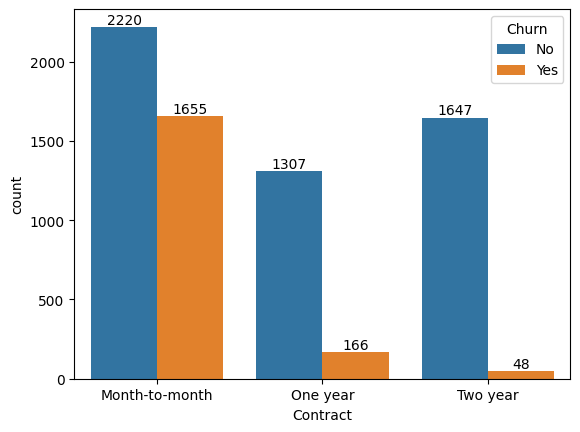

In [37]:
plt.Figure(figsize=(3,4))
ax = sn.countplot(x= df['Contract'], data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

- people who have monthly plan are more likely to Churn than who have yearly contract 

In [39]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### SUB PLOT

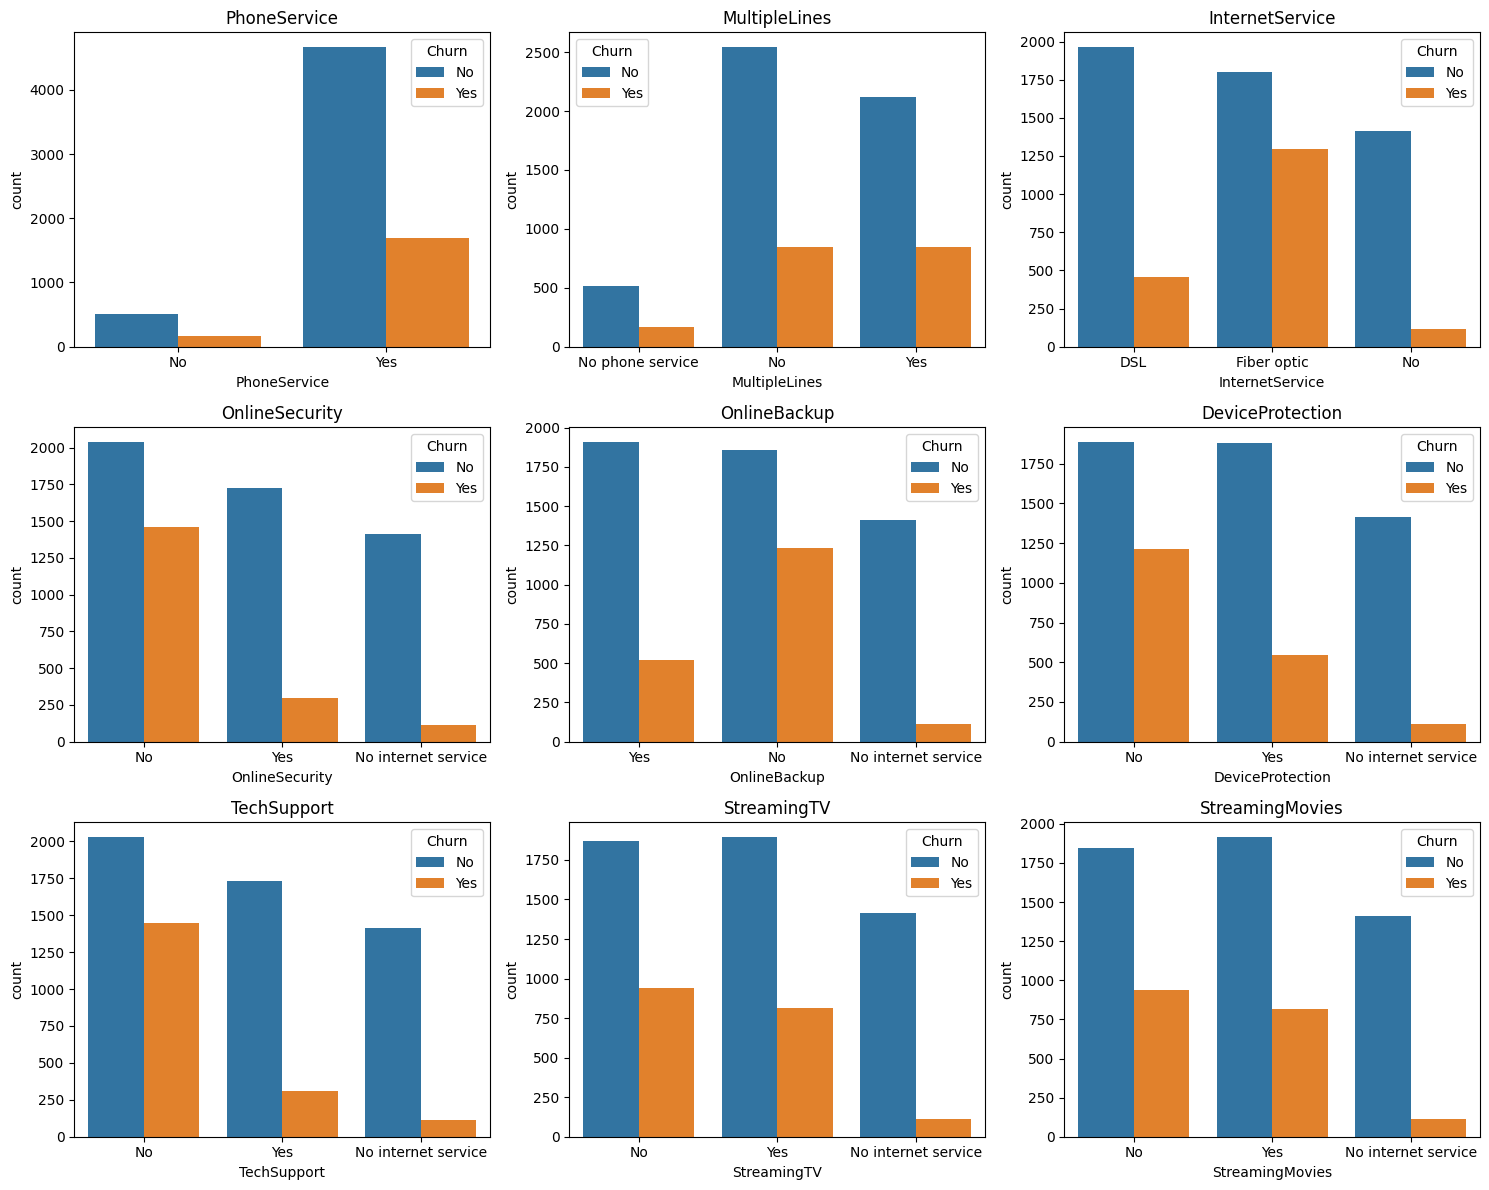

In [43]:

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(15,12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)          # 3 rows, 3 columns, i-th plot
    sn.countplot(x=df[col], hue= df['Churn'])
    plt.title(col)
    plt.tight_layout()


- Customers without value-added services (security, backup, protection, tech support) churn much more than those who have them.

- Fiber optic internet users churn the most, indicating dissatisfaction or price sensitivity in that segment.

- Customers with no internet service have almost no churn, likely older or low-usage customers who stay stable.

- PhoneService alone doesn't drive churn, but MultipleLines increases churn slightly.

- Streaming services (TV/Movies) show higher churn among non-subscribers, meaning lack of engagement leads to exit.

- Overall pattern: More services = lower churn.

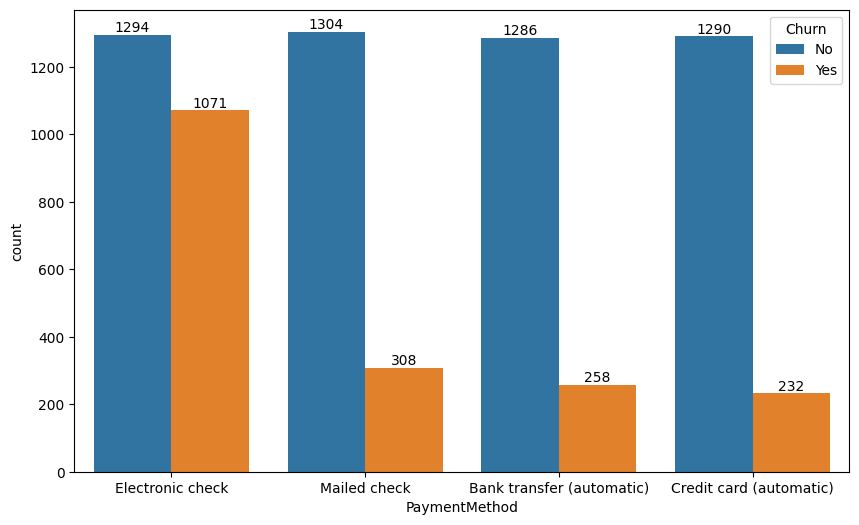

In [47]:
plt.figure(figsize=(10,6))
ax = sn.countplot(x= df['PaymentMethod'], data= df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

- electronic check have the highest churned count compared to other payment method